# Lactancia materna, tipo de parto y enfermedades autoinmunes en adultos que acuden a consultas en una clínica privada

## Objetivo general
Determinar la frecuencia de lactancia materna, el tipo de parto y de enfermedades autoinmunes en adultos de ambos sexos que asisten a consultas médicas y nutricionales en la Clínica Masquelier Medicina Integrativa durante el mes de enero a setiembre de 2020.

## Objetivos específicos
1. Caracterizar a la muestra según datos demográficos
2. Identificar los tipos de partos
3. Describir el tipo de alimentación recibida durante la infancia
4. Determinar el tipo de enfermedades autoinmunes adquiridas
5. Explorar relación entre el tipo de parto, la lactancia materna y las enfermedades autoinmunes adquiridas

In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuraciones globales
sns.set_theme(rc={'figure.figsize':[12,8]}, font_scale=1.25)

In [2]:
# Importando datos
df = pd.read_excel('RECOLECCION DE DATOS.xls')

In [3]:
# Núm. casos y de variables
df.shape

(401, 23)

In [4]:
# Características de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   401 non-null    int64 
 1   SUJETO                       401 non-null    object
 2   FECHA DE NAC                 401 non-null    object
 3   EDAD                         401 non-null    int64 
 4   SEXO                         401 non-null    object
 5   VIA DE NACIMIENTO            401 non-null    object
 6   Lact. Si                     396 non-null    object
 7   Lact. No                     8 non-null      object
 8   TIEMPO DE LACTANCIA          401 non-null    object
 9   TIEMPO DE LACTANCIA          337 non-null    object
 10  DX ENF AUTOINM               401 non-null    object
 11  HIPOT                        401 non-null    object
 12  CELIAQUIA                    401 non-null    object
 13  ARTRITIS                     401 no

In [5]:
# Casos de cabecera
df.head()

,Unnamed: 0,SUJETO,FECHA DE NAC,EDAD,SEXO,VIA DE NACIMIENTO,Lact. Si,Lact. No,TIEMPO DE LACTANCIA,TIEMPO DE LACTANCIA,...,ARTRITIS,OTRAS PATOLOGIAS ASOCIADAS,RINITIS ALERGICA,SII,SOP,OBS,CONSUMO DE ATB,SINTOMAS GASTRICOS,SINTOMAS SIST INMUNOLOGICO,sobrepeso u obesidad
0,1,SARA DE OLIVEIRA,1960-01-28 00:00:00,60,FEM,VAGINAL,SI,NaN,MAS DE 1 AÑO,MAS DE 6 MESES,...,NO,"HIPERCOLESTE, DEPRES, ANDIEDAD",NaN,NaN,NaN,-,SI,"NAUSEAS, INT.AL, MAL ALIENTO, AFTAS","DOLORES ARTIC. MANOS, PIES",NaN
1,2,NATALIA CARPINELLI,1977-08-27 00:00:00,43,FEM,CESAREA,SI,NaN,3 MESES,MENOS DE 6 MESES,...,NO,"ANSIEDAD, GASTRITIS",NaN,NaN,NaN,-,NO ESPEC,"GLUTEN, LACTOSA","DOLORES ARTIC. MANOS, PIES",NaN
2,3,NOELIA BUTTICE,1975-07-28 00:00:00,44,FEM,VAGINAL,SI,NaN,MENOS DE 1 MES,MENOS DE 6 MESES,...,NO,"RINITIS ALERGICA, GASTRITIS, SII",SI,SI,NaN,-,SI,"AFTAS, MAL ALIENTO, DOLOR ABD",NO ESPECIFICA,NaN
3,4,MA. TERESA CESPEDES,1960-02-23 00:00:00,60,FEM,VAGINAL,SI,NaN,MAS DE 1 AÑO,MAS DE 6 MESES,...,NO,"DEPRESION, SINDR. PANICO, ANSIED",NaN,NaN,NaN,-,SI,NaN,"DOLORES ARTIC. MANOS, PIES, OTROS",NaN
4,5,ENRIQUE ARRUA,1977-05-08 00:00:00,42,MASC,CESAREA,SI,NaN,MAS DE 1 AÑO,MAS DE 6 MESES,...,NO,"RINITIS ALERGICA, GASTRITIS, SII",SI,SI,NaN,-,SI,LACTOSA,NaN,NaN


## Análisis estadístico

La asociación entre vía de nacimiento, tiempo de lactancia y presencia de enfermedades autoinmumes (incluyendo patología tiroidea, tiroiditis de Hashimoto, enfermedad celíaca y artritis reumatoide) fue evaluada usando la prueba del $\chi^2$. Las diferencias se consideraron estadísticamente significativas cuando $P<0.05$ para 2 colas de distribución. Los datos fueron analizados en Python versión 3.8 (Anaconda Distribution 2020.07, Anaconda, Inc., Austin, TX), usando las librerías Pandas, NumPy y SciPy para los análisis estadísticos, y las librerias MatPlotLib y SeaBorn para los gráficos.

## Resultados

### Objetivo específico núm. 1: Caracterizar a la muestra según datos demográficos

#### Distribución según edad

In [6]:
df['EDAD'].describe().round(1)

count    401.0
mean      41.6
std       14.2
min       18.0
25%       31.0
50%       39.0
75%       51.0
max       80.0
Name: EDAD, dtype: float64

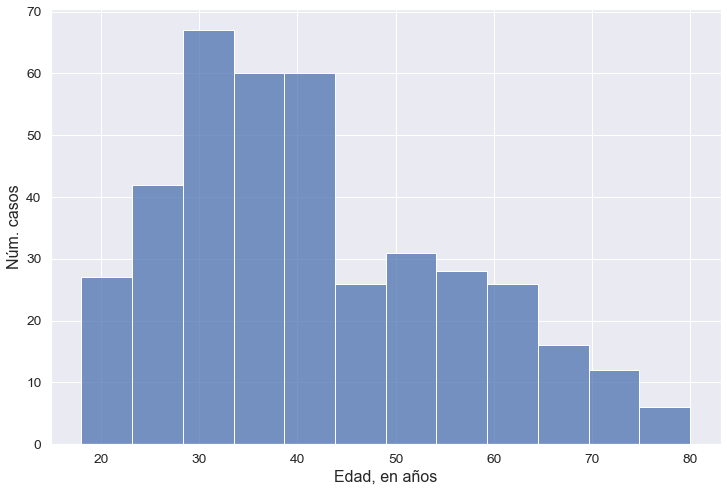

In [7]:
ax = sns.histplot(x='EDAD', data=df)
plt.xlabel('Edad, en años', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Distribución según sexo

In [8]:
df.replace({'FEM':'Femenino','MASC':'Masculino'}, inplace=True)
df['SEXO'].value_counts()

Femenino     318
Masculino     83
Name: SEXO, dtype: int64

In [9]:
df['SEXO'].value_counts(normalize=True).round(2)

Femenino     0.79
Masculino    0.21
Name: SEXO, dtype: float64

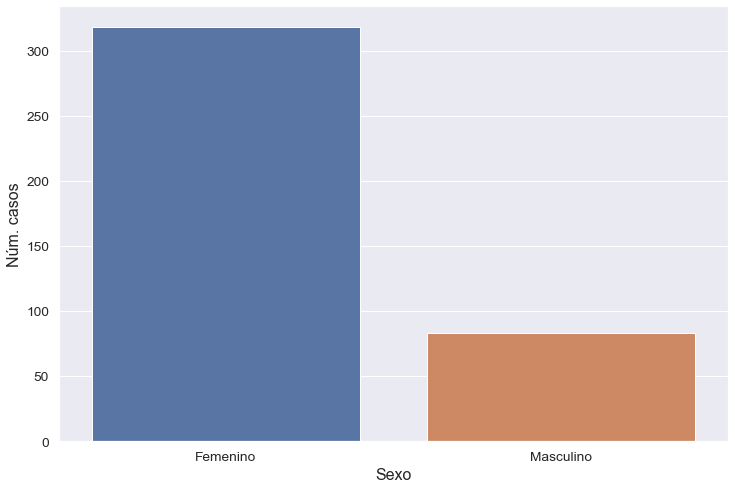

In [10]:
sns.countplot(x='SEXO', data=df)
plt.xlabel('Sexo', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

### Objetivo específico núm. 2: Identificar los tipos de partos

#### Distribución según vías de nacimiento

In [11]:
df['VIA DE NACIMIENTO'].replace({'VAGINAL ':'Vaginal','CESAREA ':'Cesárea','NO ESPECIFICA':np.nan}, inplace=True)
df['VIA DE NACIMIENTO'].value_counts()

Vaginal    248
Cesárea    146
Name: VIA DE NACIMIENTO, dtype: int64

In [12]:
df['VIA DE NACIMIENTO'].isna().sum()

7

In [13]:
df['VIA DE NACIMIENTO'].value_counts(normalize=True).round(2)

Vaginal    0.63
Cesárea    0.37
Name: VIA DE NACIMIENTO, dtype: float64

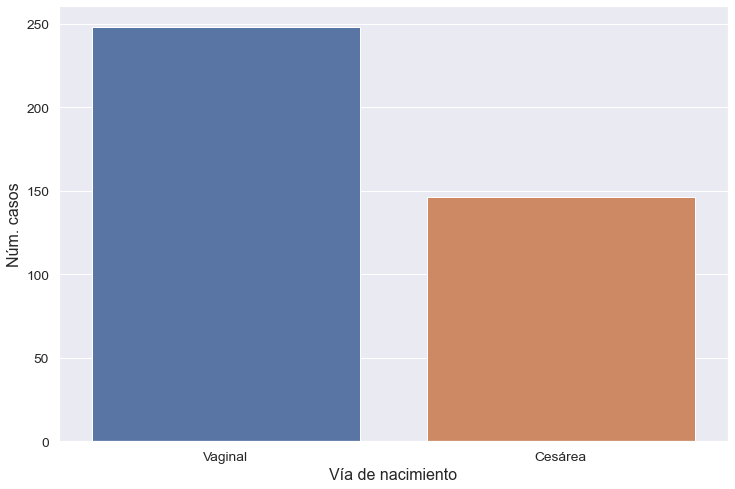

In [14]:
sns.countplot(x='VIA DE NACIMIENTO', data=df)
plt.xlabel('Vía de nacimiento', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

### Objetivo específico núm. 3: Describir el tipo de alimentación recibida durante la infancia

#### Distribución de acuerdo a la duración de la lactancia recibida

In [15]:
# Las 4 categorías originales fueron colapsadas a 2 categorías, siguiendo las instrucciones proveídas por los tutores
# Las 2 categorías finales incluyen '6 meses o menos' (no mamó + menos de 6 meses + 6 meses) y 'Más de 6 meses' (el resto)

df['TIEMPO DE LACTANCIA '].replace({'NO MAMO':'6 meses o menos','MENOS DE 6 MESES':'6 meses o menos','MAS DE 6 MESES':'Más de 6 meses','6 MESES':'6 meses o menos'}, inplace=True)
df['TIEMPO DE LACTANCIA '] = df['TIEMPO DE LACTANCIA '].astype('category')
df['TIEMPO DE LACTANCIA '].cat.reorder_categories(['6 meses o menos','Más de 6 meses'], inplace=True)
df['TIEMPO DE LACTANCIA '].value_counts(sort=False)

6 meses o menos    226
Más de 6 meses     111
Name: TIEMPO DE LACTANCIA , dtype: int64

In [16]:
df['TIEMPO DE LACTANCIA '].value_counts(sort=False, normalize=True).round(2)

6 meses o menos    0.67
Más de 6 meses     0.33
Name: TIEMPO DE LACTANCIA , dtype: float64

In [17]:
df['TIEMPO DE LACTANCIA '].isna().sum()

64

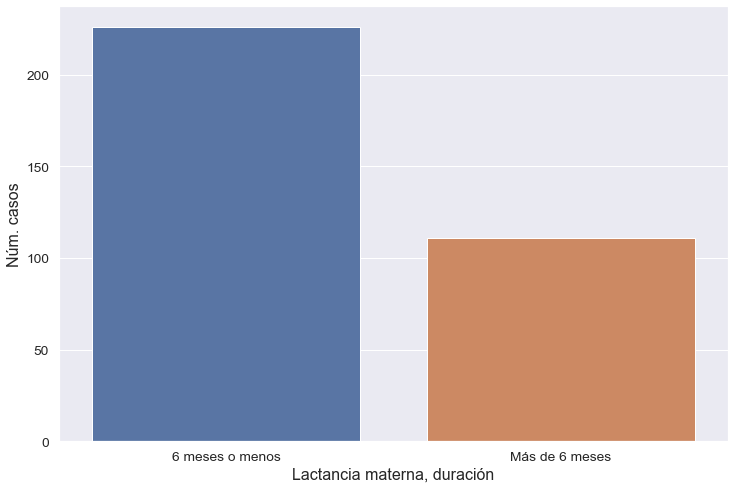

In [18]:
sns.countplot(x='TIEMPO DE LACTANCIA ', data=df)
plt.xlabel('Lactancia materna, duración', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

### Objetivo específico núm. 4: Determinar el tipo de enfermedades autoinmunes adquiridas

#### Enfermedades autoinmunes en general

In [19]:
df['DX ENF AUTOINM'].replace({'SI ':'Sí','NO ':'No'}, inplace=True)
df['DX ENF AUTOINM'].value_counts(sort=False)

No    292
Sí    109
Name: DX ENF AUTOINM, dtype: int64

In [20]:
df['DX ENF AUTOINM'].value_counts(sort=False, normalize=True).round(2)

No    0.73
Sí    0.27
Name: DX ENF AUTOINM, dtype: float64

In [21]:
df['DX ENF AUTOINM'].isna().sum()

0

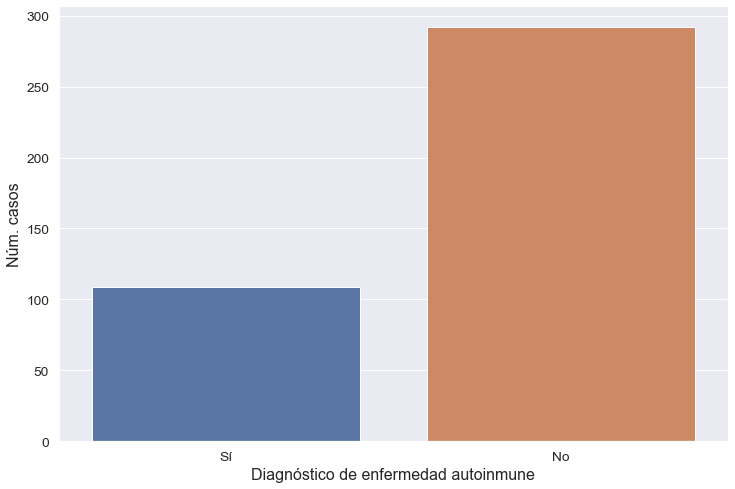

In [22]:
sns.countplot(x='DX ENF AUTOINM', data=df)
plt.xlabel('Diagnóstico de enfermedad autoinmune', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Enfermedad tiroidea

In [23]:
# Siguiendo las indicaciones dadas por los tutores, se consideraron los casos con 'HIPO' como Hashimoto, los casos 'HIPER E HIPO' e 'HIPO PQ' como hipotiroidismo, y el resto similar

df['HIPOT '].replace({'NO':'Ninguna','NO ':'Ninguna','HIPO':'Hashimoto','HIPO PQ':'Hipotiroidismo','HIPER':'Hipertiroidismo','HIPER E HIPO':'Hipotiroidismo','HASHIMOTO':'Hashimoto'}, inplace=True)
df['HIPOT '] = df['HIPOT '].astype('category')
df['HIPOT '].cat.reorder_categories(['Hashimoto','Hipotiroidismo','Hipertiroidismo','Ninguna'])
df['HIPOT '].value_counts(sort=False)

Hashimoto           67
Hipertiroidismo      4
Hipotiroidismo       6
Ninguna            324
Name: HIPOT , dtype: int64

In [24]:
df['HIPOT '].value_counts(sort=False, normalize=True).round(2)

Hashimoto          0.17
Hipertiroidismo    0.01
Hipotiroidismo     0.01
Ninguna            0.81
Name: HIPOT , dtype: float64

In [25]:
df['HIPOT '].isna().sum()

0

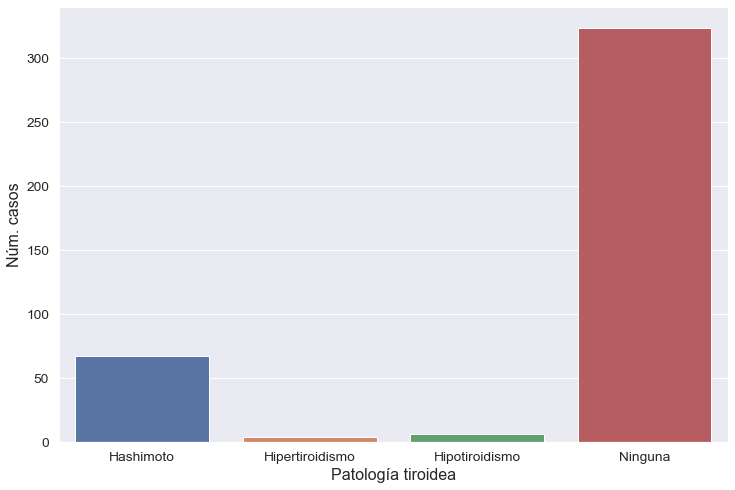

In [26]:
sns.countplot(x='HIPOT ', data=df)
plt.xlabel('Patología tiroidea', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Enfermedad Celiaca

In [27]:
df['CELIAQUIA '].replace({'NO':'No','NO ':'No','SI':'Sí','SI ':'Sí'}, inplace=True)
df['CELIAQUIA '].value_counts(sort=False)

No    375
Sí     26
Name: CELIAQUIA , dtype: int64

In [28]:
df['CELIAQUIA '].value_counts(sort=False, normalize=True).round(2)

No    0.94
Sí    0.06
Name: CELIAQUIA , dtype: float64

In [29]:
df['CELIAQUIA '].isna().sum()

0

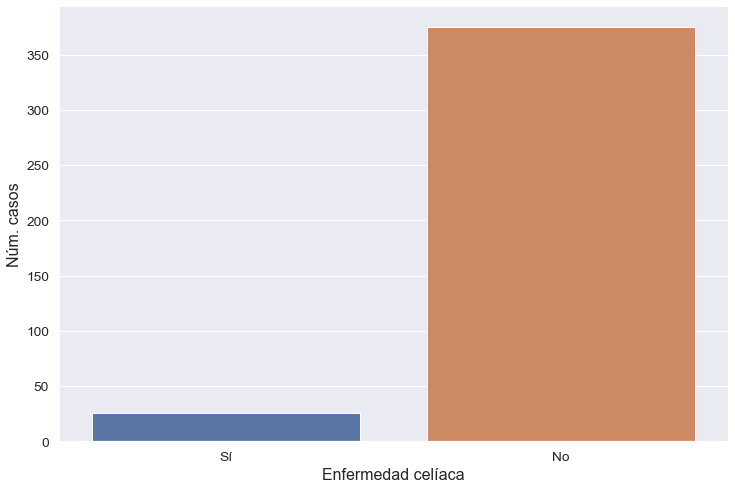

In [30]:
sns.countplot(x='CELIAQUIA ', data=df, order=['Sí','No'])
plt.xlabel('Enfermedad celíaca', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Artritis reumatoide

In [31]:
df['ARTRITIS'].replace({'SI':'Sí','NO':'No','NO ':'No'}, inplace=True)
df['ARTRITIS'].value_counts(sort=False)

No    388
Sí     13
Name: ARTRITIS, dtype: int64

In [32]:
df['ARTRITIS'].value_counts(sort=False, normalize=True).round(2)

No    0.97
Sí    0.03
Name: ARTRITIS, dtype: float64

In [33]:
df['ARTRITIS'].isna().sum()

0

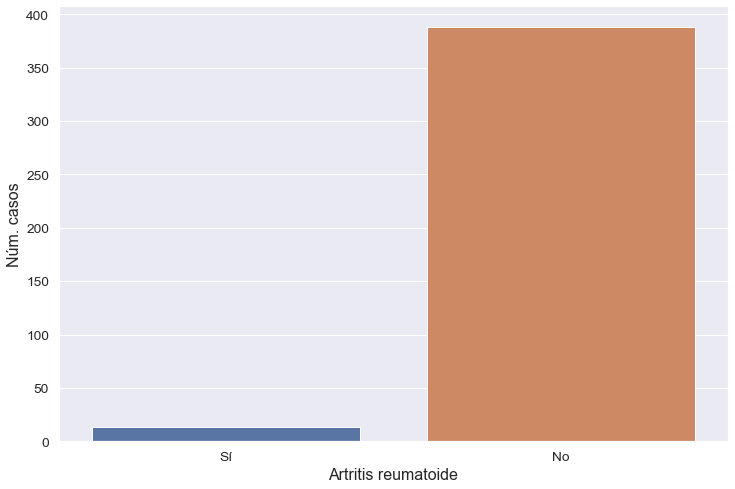

In [34]:
sns.countplot(x='ARTRITIS', data=df, order=['Sí','No'])
plt.xlabel('Artritis reumatoide', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [35]:
# Considerando sólo casos con enfermedades autoinmunes
df.rename(columns={'DX ENF AUTOINM':'DX_ENF_AUTOINM'}, inplace=True)
df_autoinmune = df.query('DX_ENF_AUTOINM == "Sí"')
df_autoinmune.shape

(109, 23)

In [36]:
df_autoinmune['HIPOT '].value_counts(normalize=True).round(2)

Hashimoto          0.61
Ninguna            0.29
Hipotiroidismo     0.06
Hipertiroidismo    0.04
Name: HIPOT , dtype: float64

In [37]:
df_autoinmune['CELIAQUIA '].value_counts(normalize=True).round(2)

No    0.76
Sí    0.24
Name: CELIAQUIA , dtype: float64

In [38]:
df_autoinmune['ARTRITIS'].value_counts(normalize=True).round(2)

No    0.88
Sí    0.12
Name: ARTRITIS, dtype: float64

### Objetivo específico núm. 5: Explorar relación entre el tipo de parto, la lactancia materna y las enfermedades autoinmunes adquiridas

#### Tipo de parto y enfermedades autoinmunes

In [39]:
pd.crosstab(index=df['VIA DE NACIMIENTO'], columns=df['DX_ENF_AUTOINM'], margins=True)

DX_ENF_AUTOINM,No,Sí,All
VIA DE NACIMIENTO,,,
Cesárea,109,37,146
Vaginal,182,66,248
All,291,103,394


In [40]:
pd.crosstab(index=df['VIA DE NACIMIENTO'], columns=df['DX_ENF_AUTOINM'], normalize='index').round(2)

DX_ENF_AUTOINM,No,Sí
VIA DE NACIMIENTO,,
Cesárea,0.75,0.25
Vaginal,0.73,0.27


In [41]:
stats.chi2_contingency(pd.crosstab(index=df['VIA DE NACIMIENTO'], columns=df['DX_ENF_AUTOINM']))

(0.025111518100861166,
 0.8740894984439348,
 1,
 array([[107.83248731,  38.16751269],
        [183.16751269,  64.83248731]]))

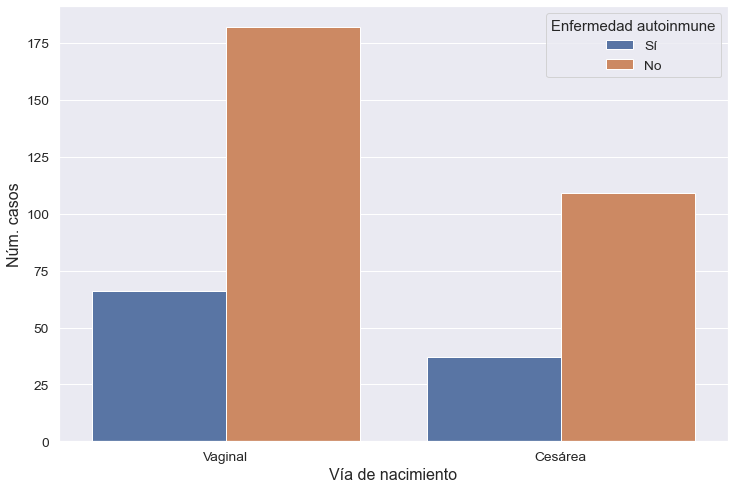

In [42]:
sns.countplot(x='VIA DE NACIMIENTO', hue='DX_ENF_AUTOINM', data=df)
plt.legend(title='Enfermedad autoinmune')
plt.xlabel('Vía de nacimiento', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Tipo de parto y patología tiroidea

In [43]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['HIPOT '], margins=True)

HIPOT,Hashimoto,Hipertiroidismo,Hipotiroidismo,Ninguna,All
VIA DE NACIMIENTO,,,,,
Cesárea,25,0,3,118,146
Vaginal,37,4,3,204,248
All,62,4,6,322,394


In [44]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['HIPOT '], normalize='index').round(2)

HIPOT,Hashimoto,Hipertiroidismo,Hipotiroidismo,Ninguna
VIA DE NACIMIENTO,,,,
Cesárea,0.17,0.00,0.02,0.81
Vaginal,0.15,0.02,0.01,0.82


In [45]:
stats.chi2_contingency(pd.crosstab(df['VIA DE NACIMIENTO'], df['HIPOT ']))

(3.0927083465217504,
 0.3775510689628158,
 3,
 array([[ 22.97461929,   1.4822335 ,   2.22335025, 119.31979695],
        [ 39.02538071,   2.5177665 ,   3.77664975, 202.68020305]]))

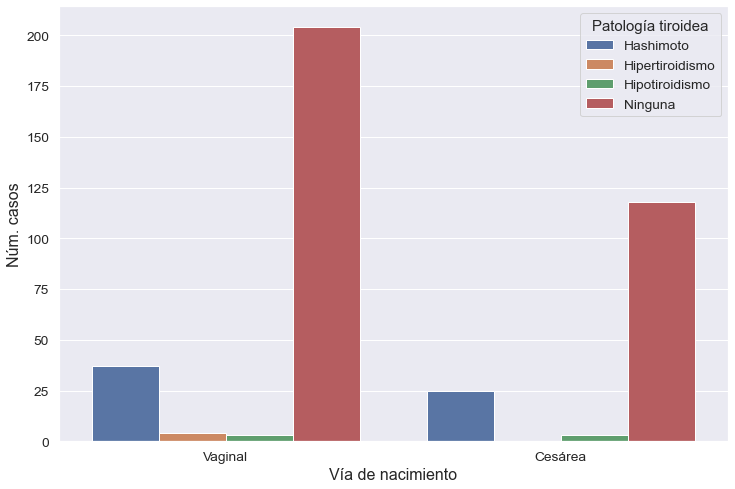

In [46]:
sns.countplot(x='VIA DE NACIMIENTO', hue='HIPOT ', data=df)
plt.legend(title='Patología tiroidea')
plt.xlabel('Vía de nacimiento', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Tipo de parto y enfermedad celíaca

In [47]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['CELIAQUIA '], margins=True)

CELIAQUIA,No,Sí,All
VIA DE NACIMIENTO,,,
Cesárea,140,6,146
Vaginal,228,20,248
All,368,26,394


In [48]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['CELIAQUIA '], normalize='index').round(2)

CELIAQUIA,No,Sí
VIA DE NACIMIENTO,,
Cesárea,0.96,0.04
Vaginal,0.92,0.08


In [49]:
stats.chi2_contingency(pd.crosstab(df['VIA DE NACIMIENTO'], df['CELIAQUIA ']))

(1.7346203367259698,
 0.187821911790718,
 1,
 array([[136.36548223,   9.63451777],
        [231.63451777,  16.36548223]]))

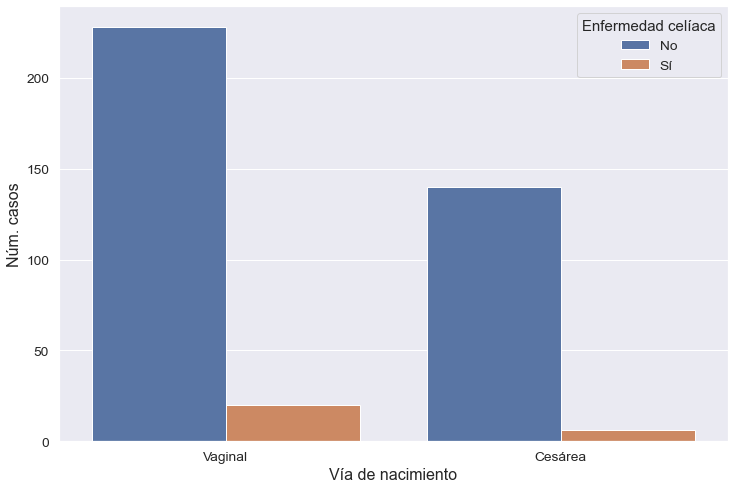

In [50]:
sns.countplot(x='VIA DE NACIMIENTO', hue='CELIAQUIA ', data=df)
plt.legend(title='Enfermedad celíaca')
plt.xlabel('Vía de nacimiento', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Tipo de parto y artritis reumatoide

In [51]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['ARTRITIS'], margins=True)

ARTRITIS,No,Sí,All
VIA DE NACIMIENTO,,,
Cesárea,140,6,146
Vaginal,242,6,248
All,382,12,394


In [52]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['ARTRITIS'], normalize='index').round(2)

ARTRITIS,No,Sí
VIA DE NACIMIENTO,,
Cesárea,0.96,0.04
Vaginal,0.98,0.02


In [53]:
stats.chi2_contingency(pd.crosstab(df['VIA DE NACIMIENTO'], df['ARTRITIS']))

(0.4088304827296081,
 0.5225637037298061,
 1,
 array([[141.55329949,   4.44670051],
        [240.44670051,   7.55329949]]))

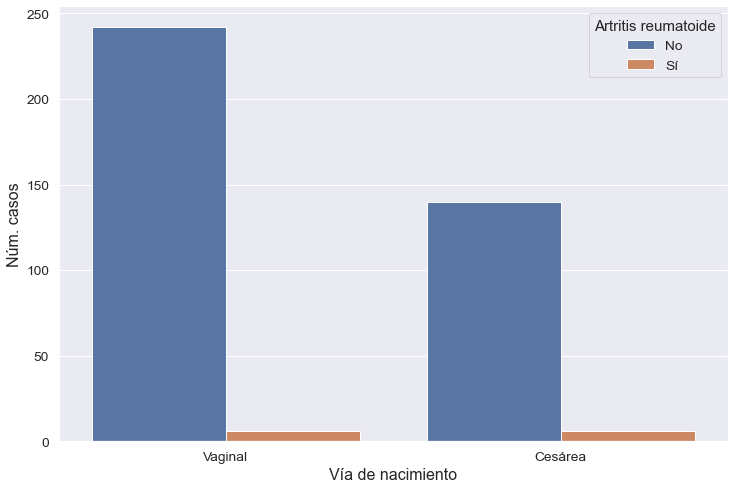

In [54]:
sns.countplot(x='VIA DE NACIMIENTO', hue='ARTRITIS', data=df)
plt.legend(title='Artritis reumatoide')
plt.xlabel('Vía de nacimiento', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Tiempo de lactancia y enfermedades autoinmunes

In [55]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['DX_ENF_AUTOINM'], margins=True)

DX_ENF_AUTOINM,No,Sí,All
TIEMPO DE LACTANCIA,,,
6 meses o menos,168,58,226
Más de 6 meses,81,30,111
All,249,88,337


In [56]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['DX_ENF_AUTOINM'], normalize='index').round(2)

DX_ENF_AUTOINM,No,Sí
TIEMPO DE LACTANCIA,,
6 meses o menos,0.74,0.26
Más de 6 meses,0.73,0.27


In [57]:
stats.chi2_contingency(pd.crosstab(df['TIEMPO DE LACTANCIA '], df['DX_ENF_AUTOINM']))

(0.01845505831971595,
 0.8919403408452815,
 1,
 array([[166.9851632,  59.0148368],
        [ 82.0148368,  28.9851632]]))

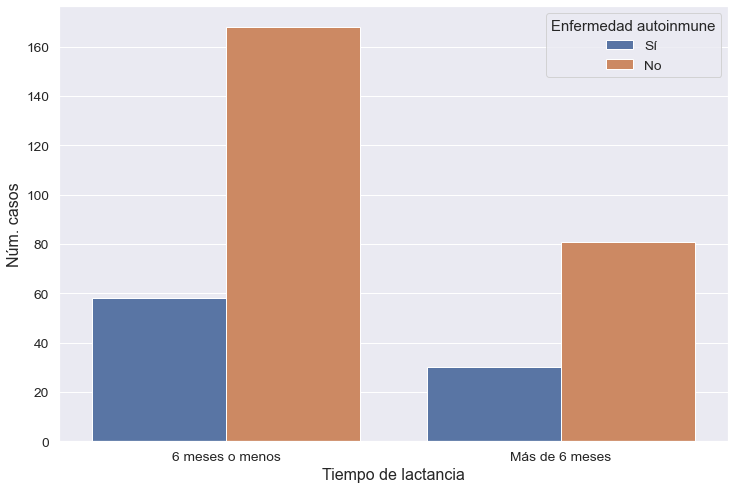

In [58]:
sns.countplot(x='TIEMPO DE LACTANCIA ', hue='DX_ENF_AUTOINM', data=df)
plt.legend(title='Enfermedad autoinmune', loc='upper right')
plt.xlabel('Tiempo de lactancia', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Tiempo de lactancia y patología tiroidea

In [59]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['HIPOT '], margins=True)

HIPOT,Hashimoto,Hipertiroidismo,Hipotiroidismo,Ninguna,All
TIEMPO DE LACTANCIA,,,,,
6 meses o menos,37,2,3,184,226
Más de 6 meses,17,2,0,92,111
All,54,4,3,276,337


In [60]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['HIPOT '], normalize='index').round(2)

HIPOT,Hashimoto,Hipertiroidismo,Hipotiroidismo,Ninguna
TIEMPO DE LACTANCIA,,,,
6 meses o menos,0.16,0.01,0.01,0.81
Más de 6 meses,0.15,0.02,0.00,0.83


In [61]:
stats.chi2_contingency(pd.crosstab(df['TIEMPO DE LACTANCIA '], df['HIPOT ']))

(2.072037376609648,
 0.5575904733481243,
 3,
 array([[ 36.21364985,   2.68249258,   2.01186944, 185.09198813],
        [ 17.78635015,   1.31750742,   0.98813056,  90.90801187]]))

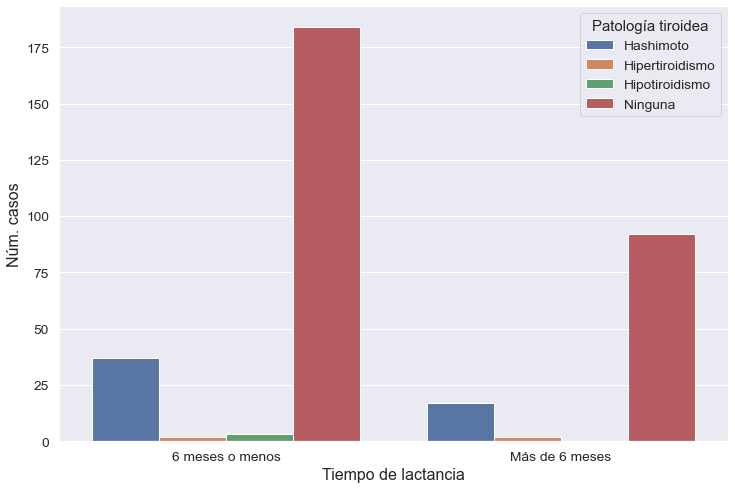

In [62]:
sns.countplot(x='TIEMPO DE LACTANCIA ', hue='HIPOT ', data=df)
plt.legend(title='Patología tiroidea', loc='upper right')
plt.xlabel('Tiempo de lactancia', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Tiempo de lactancia y enfermedad celíaca

In [63]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['CELIAQUIA '], margins=True)

CELIAQUIA,No,Sí,All
TIEMPO DE LACTANCIA,,,
6 meses o menos,210,16,226
Más de 6 meses,104,7,111
All,314,23,337


In [64]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['CELIAQUIA '], normalize='index').round(2)

CELIAQUIA,No,Sí
TIEMPO DE LACTANCIA,,
6 meses o menos,0.93,0.07
Más de 6 meses,0.94,0.06


In [65]:
stats.chi2_contingency(pd.crosstab(df['TIEMPO DE LACTANCIA '], df['CELIAQUIA ']))

(0.0012095431317486372,
 0.972256375440317,
 1,
 array([[210.57566766,  15.42433234],
        [103.42433234,   7.57566766]]))

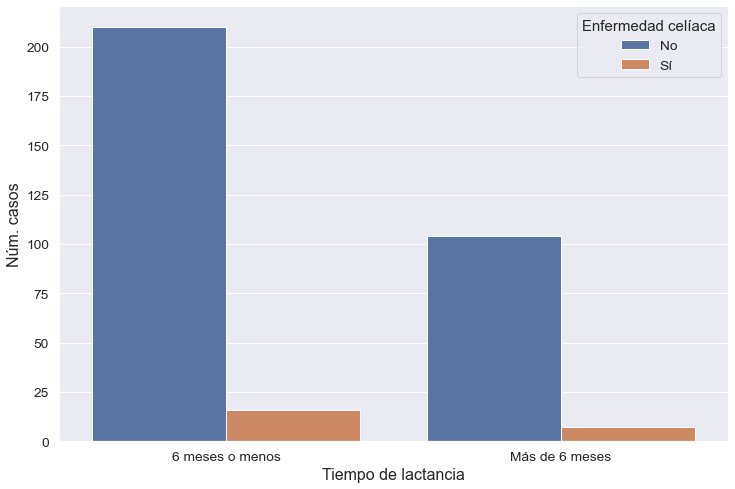

In [66]:
sns.countplot(x='TIEMPO DE LACTANCIA ', hue='CELIAQUIA ', data=df)
plt.legend(title='Enfermedad celíaca')
plt.xlabel('Tiempo de lactancia', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Tiempo de lactancia y artritis reumatoide

In [67]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['ARTRITIS'], margins=True)

ARTRITIS,No,Sí,All
TIEMPO DE LACTANCIA,,,
6 meses o menos,221,5,226
Más de 6 meses,106,5,111
All,327,10,337


In [68]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['ARTRITIS'], normalize='index').round(2)

ARTRITIS,No,Sí
TIEMPO DE LACTANCIA,,
6 meses o menos,0.98,0.02
Más de 6 meses,0.95,0.05


In [69]:
stats.chi2_contingency(pd.crosstab(df['TIEMPO DE LACTANCIA '], df['ARTRITIS']))

(0.6788468859782899,
 0.4099840777570819,
 1,
 array([[219.29376855,   6.70623145],
        [107.70623145,   3.29376855]]))

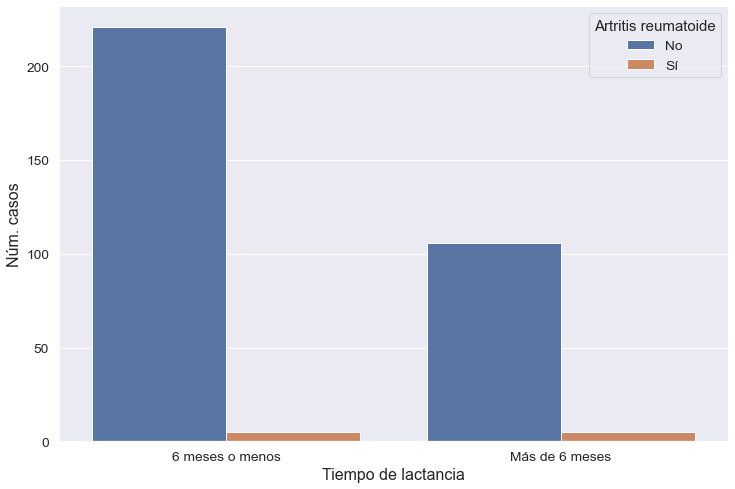

In [70]:
sns.countplot(x='TIEMPO DE LACTANCIA ', hue='ARTRITIS', data=df)
plt.legend(title='Artritis reumatoide')
plt.xlabel('Tiempo de lactancia', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

#### Tipo de parto + tiempo de lactancia y enfermedades autoinmunes

In [71]:
df['PARTO + LACTANCIA'] = df['VIA DE NACIMIENTO'].astype(str) + ' - ' + df['TIEMPO DE LACTANCIA '].astype(str)
df['PARTO + LACTANCIA'].replace({'Cesárea - nan':np.nan,'Vaginal - nan':np.nan,'nan - nan':np.nan}, inplace=True)
df['PARTO + LACTANCIA'] = df['PARTO + LACTANCIA'].astype('category')
df['PARTO + LACTANCIA'].cat.reorder_categories(['Vaginal - 6 meses o menos','Vaginal - Más de 6 meses','Cesárea - 6 meses o menos','Cesárea - Más de 6 meses'], ordered=True, inplace=True)
df['PARTO + LACTANCIA'].value_counts(sort=False)

Vaginal - 6 meses o menos    143
Vaginal - Más de 6 meses      77
Cesárea - 6 meses o menos     83
Cesárea - Más de 6 meses      34
Name: PARTO + LACTANCIA, dtype: int64

In [72]:
df['PARTO + LACTANCIA'].value_counts(sort=False, normalize=True).round(2)

Vaginal - 6 meses o menos    0.42
Vaginal - Más de 6 meses     0.23
Cesárea - 6 meses o menos    0.25
Cesárea - Más de 6 meses     0.10
Name: PARTO + LACTANCIA, dtype: float64

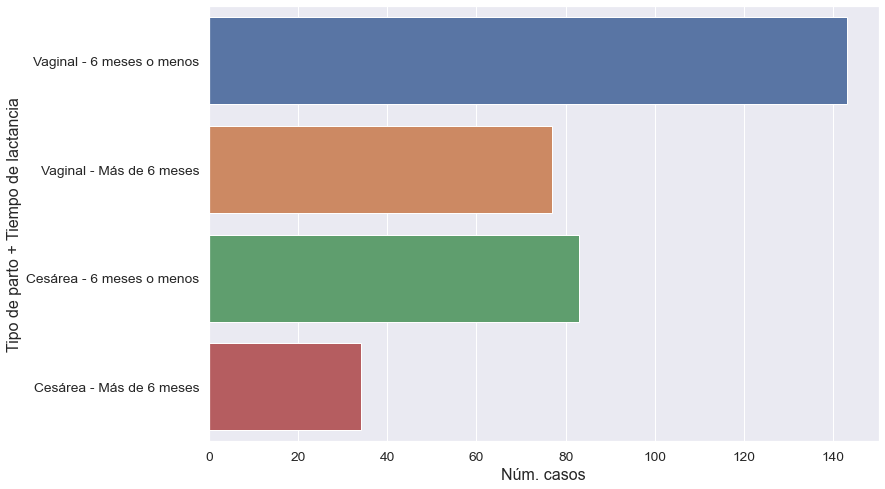

In [73]:
sns.countplot(y='PARTO + LACTANCIA', data=df)
plt.xlabel('Núm. casos', size=16)
plt.ylabel('Tipo de parto + Tiempo de lactancia', size=16)
plt.show()

In [74]:
pd.crosstab(df['PARTO + LACTANCIA'], df['DX_ENF_AUTOINM'], margins=True, margins_name='Total')

DX_ENF_AUTOINM,No,Sí,Total
PARTO + LACTANCIA,,,
Vaginal - 6 meses o menos,106,37,143
Vaginal - Más de 6 meses,55,22,77
Cesárea - 6 meses o menos,62,21,83
Cesárea - Más de 6 meses,26,8,34
Total,249,88,337


In [75]:
pd.crosstab(df['PARTO + LACTANCIA'], df['DX_ENF_AUTOINM'], normalize='index').round(2)

DX_ENF_AUTOINM,No,Sí
PARTO + LACTANCIA,,
Vaginal - 6 meses o menos,0.74,0.26
Vaginal - Más de 6 meses,0.71,0.29
Cesárea - 6 meses o menos,0.75,0.25
Cesárea - Más de 6 meses,0.76,0.24


In [76]:
stats.chi2_contingency(pd.crosstab(df['PARTO + LACTANCIA'], df['DX_ENF_AUTOINM']))

(0.39140839419222445,
 0.9420115451162338,
 3,
 array([[105.65875371,  37.34124629],
        [ 56.89317507,  20.10682493],
        [ 61.3264095 ,  21.6735905 ],
        [ 25.12166172,   8.87833828]]))

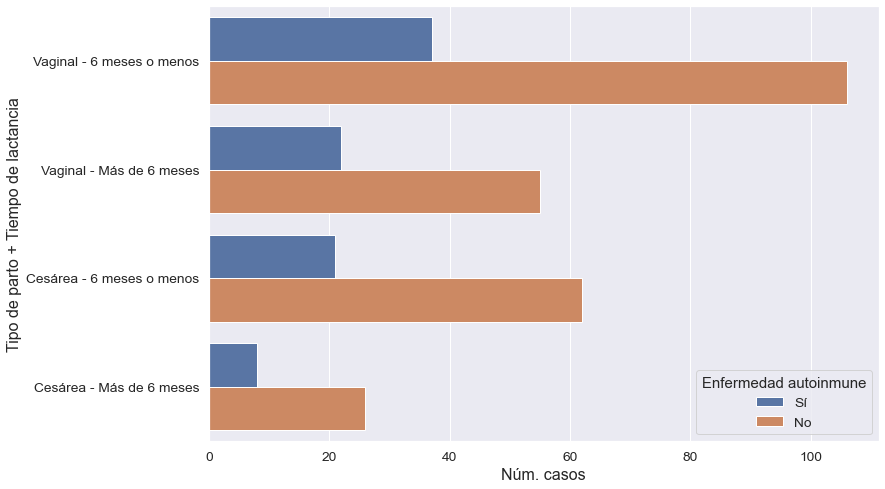

In [77]:
sns.countplot(y='PARTO + LACTANCIA', hue='DX_ENF_AUTOINM', data=df)
plt.xlabel('Núm. casos', size=16)
plt.ylabel('Tipo de parto + Tiempo de lactancia', size=16)
plt.legend(title='Enfermedad autoinmune')
plt.show()

#### Tipo de parto + tiempo de lactancia y patología tiroidea

In [78]:
pd.crosstab(df['PARTO + LACTANCIA'], df['HIPOT '], margins=True, margins_name='Total')

HIPOT,Hashimoto,Hipertiroidismo,Hipotiroidismo,Ninguna,Total
PARTO + LACTANCIA,,,,,
Vaginal - 6 meses o menos,21,2,1,119,143
Vaginal - Más de 6 meses,13,2,0,62,77
Cesárea - 6 meses o menos,16,0,2,65,83
Cesárea - Más de 6 meses,4,0,0,30,34
Total,54,4,3,276,337


In [79]:
pd.crosstab(df['PARTO + LACTANCIA'], df['HIPOT '], normalize='index').round(2)

HIPOT,Hashimoto,Hipertiroidismo,Hipotiroidismo,Ninguna
PARTO + LACTANCIA,,,,
Vaginal - 6 meses o menos,0.15,0.01,0.01,0.83
Vaginal - Más de 6 meses,0.17,0.03,0.00,0.81
Cesárea - 6 meses o menos,0.19,0.00,0.02,0.78
Cesárea - Más de 6 meses,0.12,0.00,0.00,0.88


In [80]:
stats.chi2_contingency(pd.crosstab(df['PARTO + LACTANCIA'], df['HIPOT ']))

(7.406161546056165,
 0.5949105441754937,
 9,
 array([[ 22.91394659,   1.69732938,   1.27299703, 117.115727  ],
        [ 12.33827893,   0.91394659,   0.68545994,  63.06231454],
        [ 13.29970326,   0.9851632 ,   0.7388724 ,  67.97626113],
        [  5.44807122,   0.40356083,   0.30267062,  27.84569733]]))

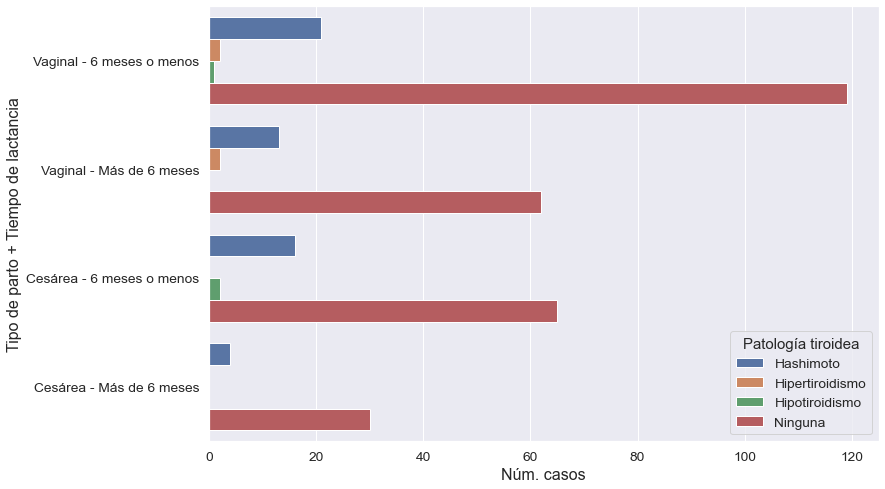

In [81]:
sns.countplot(y='PARTO + LACTANCIA', hue='HIPOT ', data=df)
plt.xlabel('Núm. casos', size=16)
plt.ylabel('Tipo de parto + Tiempo de lactancia', size=16)
plt.legend(title='Patología tiroidea', loc='lower right')
plt.show()

#### Tipo de parto + tiempo de lactancia y enfermedad celíaca

In [82]:
pd.crosstab(df['PARTO + LACTANCIA'], df['CELIAQUIA '], margins=True, margins_name='Total')

CELIAQUIA,No,Sí,Total
PARTO + LACTANCIA,,,
Vaginal - 6 meses o menos,128,15,143
Vaginal - Más de 6 meses,73,4,77
Cesárea - 6 meses o menos,82,1,83
Cesárea - Más de 6 meses,31,3,34
Total,314,23,337


In [83]:
pd.crosstab(df['PARTO + LACTANCIA'], df['CELIAQUIA '], normalize='index').round(2)

CELIAQUIA,No,Sí
PARTO + LACTANCIA,,
Vaginal - 6 meses o menos,0.90,0.10
Vaginal - Más de 6 meses,0.95,0.05
Cesárea - 6 meses o menos,0.99,0.01
Cesárea - Más de 6 meses,0.91,0.09


In [84]:
stats.chi2_contingency(pd.crosstab(df['PARTO + LACTANCIA'], df['CELIAQUIA ']))

(7.677778914704545,
 0.053162268285659536,
 3,
 array([[133.24035608,   9.75964392],
        [ 71.74480712,   5.25519288],
        [ 77.33531157,   5.66468843],
        [ 31.67952522,   2.32047478]]))

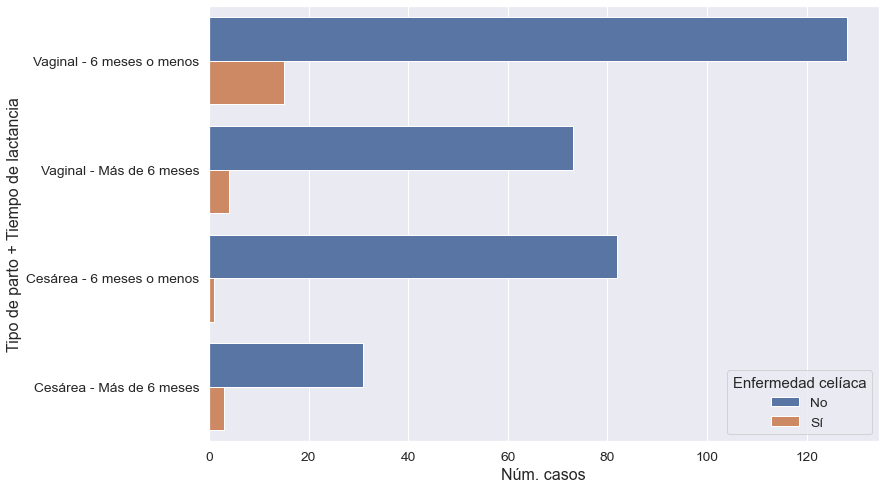

In [85]:
sns.countplot(y='PARTO + LACTANCIA', hue='CELIAQUIA ', data=df)
plt.xlabel('Núm. casos', size=16)
plt.ylabel('Tipo de parto + Tiempo de lactancia', size=16)
plt.legend(title='Enfermedad celíaca', loc='lower right')
plt.show()

#### Tipo de parto + tiempo de lactancia y artritis reumatoide

In [86]:
pd.crosstab(df['PARTO + LACTANCIA'], df['ARTRITIS'], margins=True, margins_name='Total')

ARTRITIS,No,Sí,Total
PARTO + LACTANCIA,,,
Vaginal - 6 meses o menos,141,2,143
Vaginal - Más de 6 meses,74,3,77
Cesárea - 6 meses o menos,80,3,83
Cesárea - Más de 6 meses,32,2,34
Total,327,10,337


In [87]:
pd.crosstab(df['PARTO + LACTANCIA'], df['ARTRITIS'], normalize='index').round(2)

ARTRITIS,No,Sí
PARTO + LACTANCIA,,
Vaginal - 6 meses o menos,0.99,0.01
Vaginal - Más de 6 meses,0.96,0.04
Cesárea - 6 meses o menos,0.96,0.04
Cesárea - Más de 6 meses,0.94,0.06


In [88]:
stats.chi2_contingency(pd.crosstab(df['PARTO + LACTANCIA'], df['ARTRITIS']))

(2.577010279191698,
 0.4615342040489915,
 3,
 array([[138.75667656,   4.24332344],
        [ 74.71513353,   2.28486647],
        [ 80.53709199,   2.46290801],
        [ 32.99109792,   1.00890208]]))

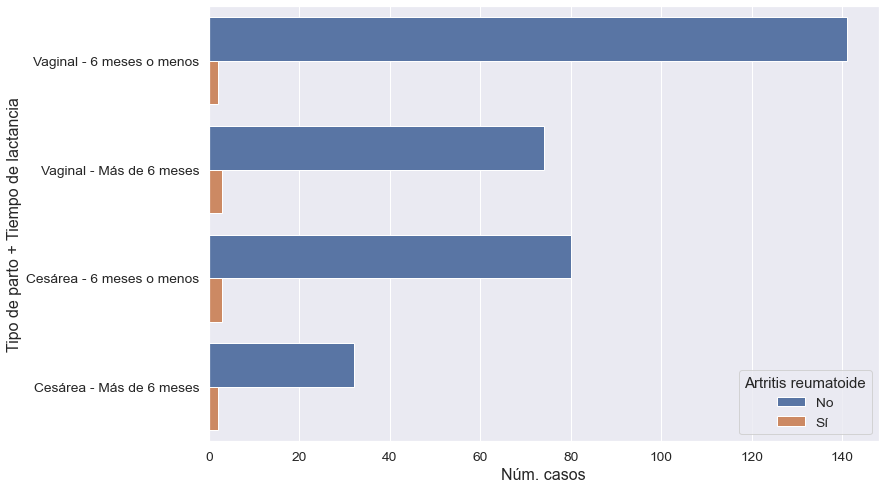

In [89]:
sns.countplot(y='PARTO + LACTANCIA', hue='ARTRITIS', data=df)
plt.xlabel('Núm. casos', size=16)
plt.ylabel('Tipo de parto + Tiempo de lactancia', size=16)
plt.legend(title='Artritis reumatoide', loc='lower right')
plt.show()

### Adicional: Otras patologías asociadas

#### Rinitis alérgica

In [90]:
df['RINITIS ALERGICA'].replace({np.nan:'No','SI ':'Sí'}, inplace=True)
df['RINITIS ALERGICA'].value_counts(sort=False)

No    295
Sí    106
Name: RINITIS ALERGICA, dtype: int64

In [91]:
df['RINITIS ALERGICA'].value_counts(sort=False, normalize=True).round(2)

No    0.74
Sí    0.26
Name: RINITIS ALERGICA, dtype: float64

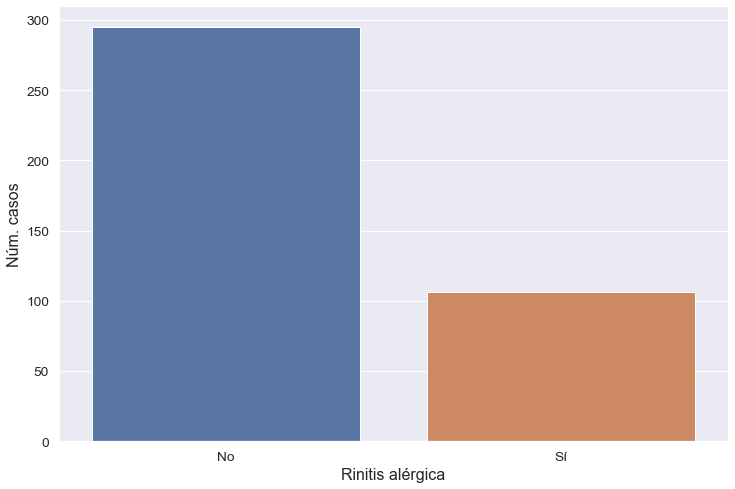

In [92]:
sns.countplot(x='RINITIS ALERGICA', data=df)
plt.xlabel('Rinitis alérgica', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [93]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['RINITIS ALERGICA'], margins=True, margins_name='Total')

RINITIS ALERGICA,No,Sí,Total
VIA DE NACIMIENTO,,,
Cesárea,107,39,146
Vaginal,183,65,248
Total,290,104,394


In [94]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['RINITIS ALERGICA'], normalize='index').round(2)

RINITIS ALERGICA,No,Sí
VIA DE NACIMIENTO,,
Cesárea,0.73,0.27
Vaginal,0.74,0.26


In [95]:
stats.chi2_contingency(pd.crosstab(df['VIA DE NACIMIENTO'], df['RINITIS ALERGICA']))

(8.117884465939302e-05,
 0.9928112129540403,
 1,
 array([[107.46192893,  38.53807107],
        [182.53807107,  65.46192893]]))

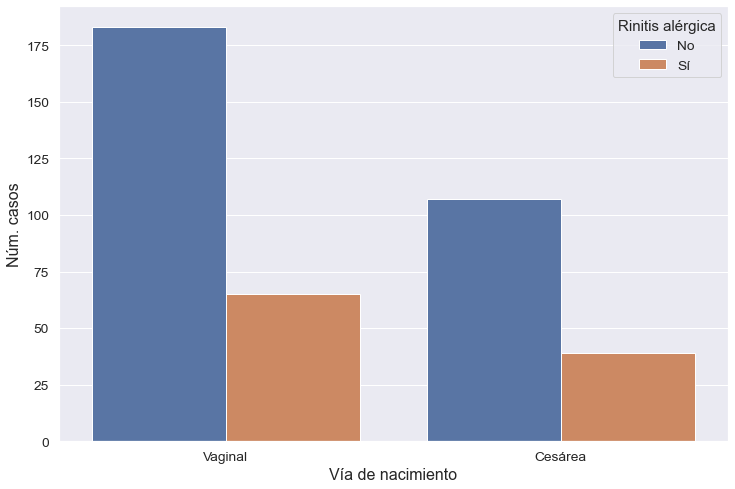

In [96]:
sns.countplot(x='VIA DE NACIMIENTO', hue='RINITIS ALERGICA', data=df)
plt.legend(title='Rinitis alérgica')
plt.xlabel('Vía de nacimiento', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [97]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['RINITIS ALERGICA'], margins=True, margins_name='Total')

RINITIS ALERGICA,No,Sí,Total
TIEMPO DE LACTANCIA,,,
6 meses o menos,169,57,226
Más de 6 meses,85,26,111
Total,254,83,337


In [98]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['RINITIS ALERGICA'], normalize='index').round(2)

RINITIS ALERGICA,No,Sí
TIEMPO DE LACTANCIA,,
6 meses o menos,0.75,0.25
Más de 6 meses,0.77,0.23


In [99]:
stats.chi2_contingency(pd.crosstab(df['TIEMPO DE LACTANCIA '], df['RINITIS ALERGICA']))

(0.050853819619828614,
 0.8215841688468062,
 1,
 array([[170.33827893,  55.66172107],
        [ 83.66172107,  27.33827893]]))

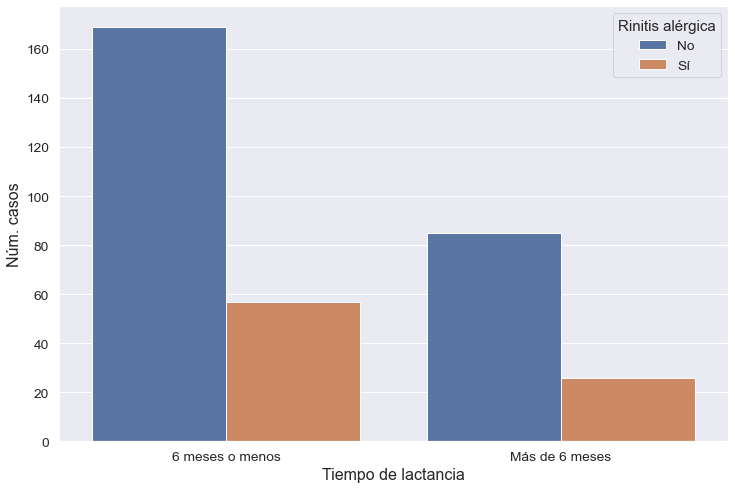

In [100]:
sns.countplot(x='TIEMPO DE LACTANCIA ', hue='RINITIS ALERGICA', data=df)
plt.legend(title='Rinitis alérgica')
plt.xlabel('Tiempo de lactancia', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [101]:
pd.crosstab(df['PARTO + LACTANCIA'], df['RINITIS ALERGICA'], margins=True, margins_name='Total')

RINITIS ALERGICA,No,Sí,Total
PARTO + LACTANCIA,,,
Vaginal - 6 meses o menos,104,39,143
Vaginal - Más de 6 meses,60,17,77
Cesárea - 6 meses o menos,65,18,83
Cesárea - Más de 6 meses,25,9,34
Total,254,83,337


In [102]:
pd.crosstab(df['PARTO + LACTANCIA'], df['RINITIS ALERGICA'], normalize='index').round(2)

RINITIS ALERGICA,No,Sí
PARTO + LACTANCIA,,
Vaginal - 6 meses o menos,0.73,0.27
Vaginal - Más de 6 meses,0.78,0.22
Cesárea - 6 meses o menos,0.78,0.22
Cesárea - Más de 6 meses,0.74,0.26


In [103]:
stats.chi2_contingency(pd.crosstab(df['PARTO + LACTANCIA'], df['RINITIS ALERGICA']))

(1.2575511752005832,
 0.7392367829931938,
 3,
 array([[107.78041543,  35.21958457],
        [ 58.03560831,  18.96439169],
        [ 62.5578635 ,  20.4421365 ],
        [ 25.62611276,   8.37388724]]))

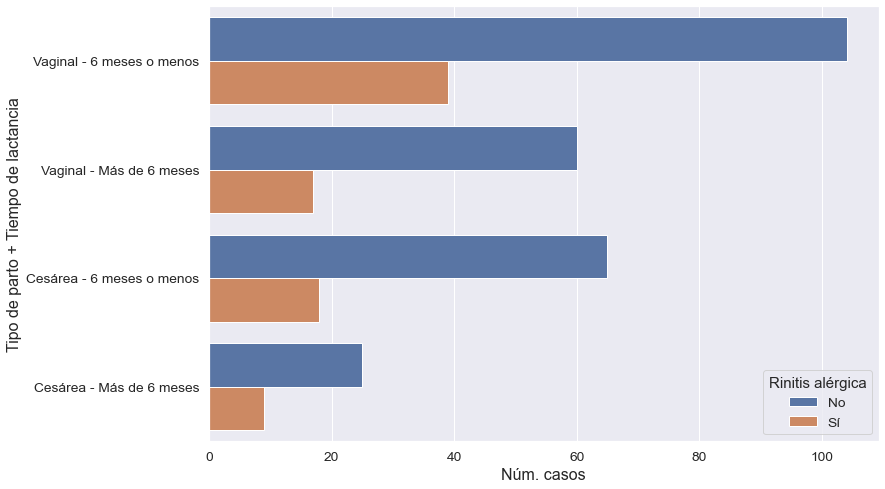

In [104]:
sns.countplot(y='PARTO + LACTANCIA', hue='RINITIS ALERGICA', data=df)
plt.xlabel('Núm. casos', size=16)
plt.ylabel('Tipo de parto + Tiempo de lactancia', size=16)
plt.legend(title='Rinitis alérgica', loc='lower right')
plt.show()

#### Síndrome del intestino irritable

In [105]:
df['SII'].replace({np.nan:'No','SI ':'Sí'}, inplace=True)
df['SII'].value_counts(sort=False)

No    273
SI    128
Name: SII, dtype: int64

In [106]:
df['SII'].value_counts(sort=False, normalize=True).round(2)

No    0.68
SI    0.32
Name: SII, dtype: float64

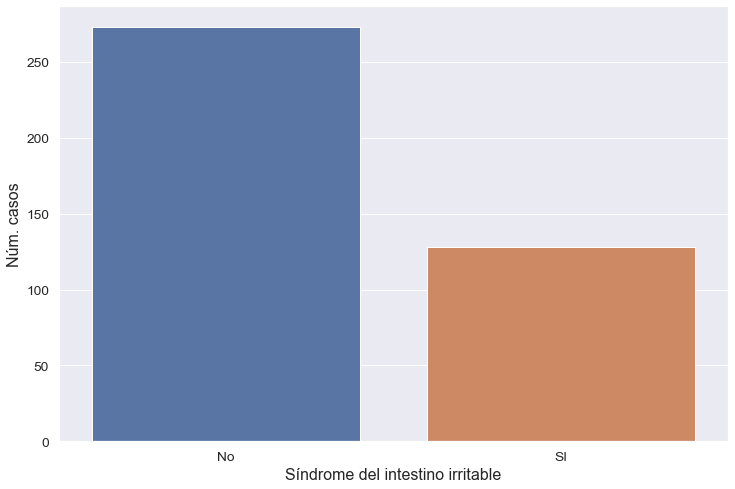

In [107]:
sns.countplot(x='SII', data=df)
plt.xlabel('Síndrome del intestino irritable', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [108]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['SII'], margins=True, margins_name='Total')

SII,No,SI,Total
VIA DE NACIMIENTO,,,
Cesárea,102,44,146
Vaginal,166,82,248
Total,268,126,394


In [109]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['SII'], normalize='index').round(2)

SII,No,SI
VIA DE NACIMIENTO,,
Cesárea,0.70,0.30
Vaginal,0.67,0.33


In [110]:
stats.chi2_contingency(pd.crosstab(df['VIA DE NACIMIENTO'], df['SII']))

(0.23999817403157422,
 0.6242074335799388,
 1,
 array([[ 99.30964467,  46.69035533],
        [168.69035533,  79.30964467]]))

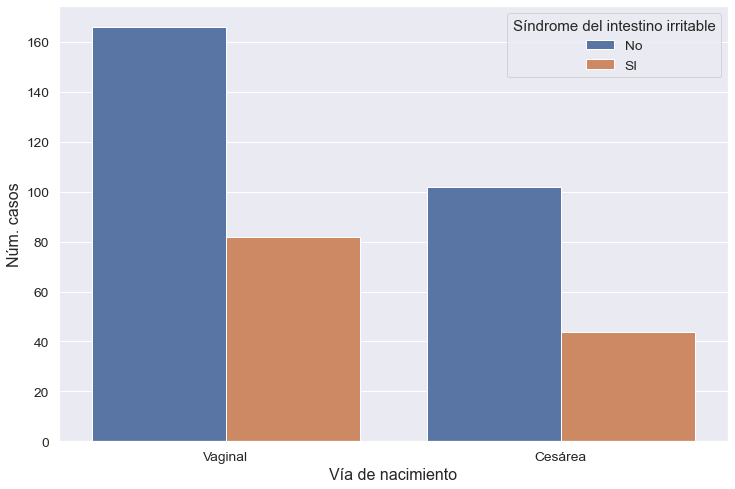

In [111]:
sns.countplot(x='VIA DE NACIMIENTO', hue='SII', data=df)
plt.legend(title='Síndrome del intestino irritable')
plt.xlabel('Vía de nacimiento', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [112]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['SII'], margins=True, margins_name='Total')

SII,No,SI,Total
TIEMPO DE LACTANCIA,,,
6 meses o menos,156,70,226
Más de 6 meses,75,36,111
Total,231,106,337


In [113]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['SII'], normalize='index').round(2)

SII,No,SI
TIEMPO DE LACTANCIA,,
6 meses o menos,0.69,0.31
Más de 6 meses,0.68,0.32


In [114]:
stats.chi2_contingency(pd.crosstab(df['TIEMPO DE LACTANCIA '], df['SII']))

(0.021400052446554324,
 0.8836943798618714,
 1,
 array([[154.91394659,  71.08605341],
        [ 76.08605341,  34.91394659]]))

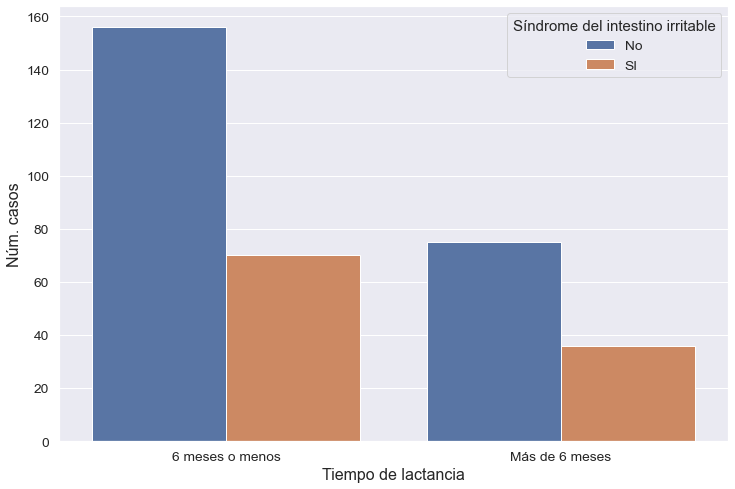

In [115]:
sns.countplot(x='TIEMPO DE LACTANCIA ', hue='SII', data=df)
plt.legend(title='Síndrome del intestino irritable')
plt.xlabel('Tiempo de lactancia', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [116]:
pd.crosstab(df['PARTO + LACTANCIA'], df['SII'], margins=True, margins_name='Total')

SII,No,SI,Total
PARTO + LACTANCIA,,,
Vaginal - 6 meses o menos,91,52,143
Vaginal - Más de 6 meses,55,22,77
Cesárea - 6 meses o menos,65,18,83
Cesárea - Más de 6 meses,20,14,34
Total,231,106,337


In [117]:
pd.crosstab(df['PARTO + LACTANCIA'], df['SII'], normalize='index').round(2)

SII,No,SI
PARTO + LACTANCIA,,
Vaginal - 6 meses o menos,0.64,0.36
Vaginal - Más de 6 meses,0.71,0.29
Cesárea - 6 meses o menos,0.78,0.22
Cesárea - Más de 6 meses,0.59,0.41


In [118]:
stats.chi2_contingency(pd.crosstab(df['PARTO + LACTANCIA'], df['SII']))

(7.05865816724733,
 0.07005145281717828,
 3,
 array([[98.02077151, 44.97922849],
        [52.78041543, 24.21958457],
        [56.89317507, 26.10682493],
        [23.30563798, 10.69436202]]))

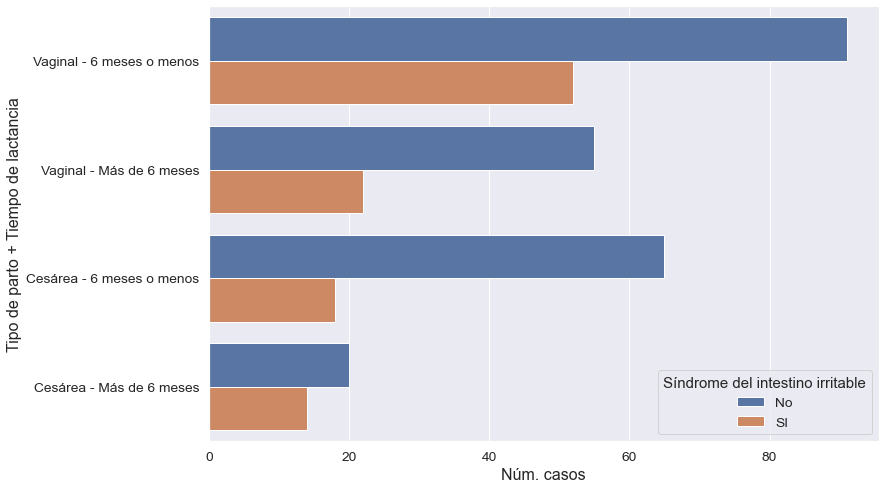

In [119]:
sns.countplot(y='PARTO + LACTANCIA', hue='SII', data=df)
plt.legend(title='Síndrome del intestino irritable')
plt.ylabel('Tipo de parto + Tiempo de lactancia', size=16)
plt.xlabel('Núm. casos', size=16)
plt.show()

#### Síndrome del ovario poliquístico

In [120]:
df['SOP'].replace({np.nan:'No','SI':'Sí'}, inplace=True)
df['SOP'].value_counts(sort=False)

No    361
Sí     40
Name: SOP, dtype: int64

In [121]:
df['SOP'].value_counts(sort=False, normalize=True).round(2)

No    0.9
Sí    0.1
Name: SOP, dtype: float64

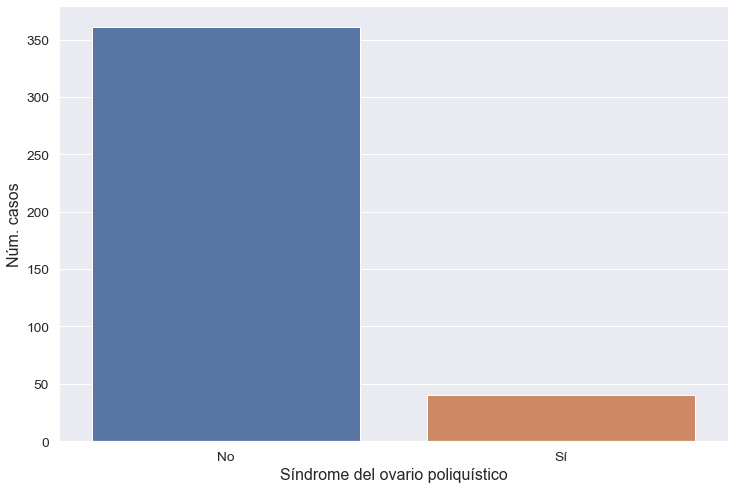

In [122]:
sns.countplot(x='SOP', data=df)
plt.xlabel('Síndrome del ovario poliquístico', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [123]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['SOP'], margins=True, margins_name='Total')

SOP,No,Sí,Total
VIA DE NACIMIENTO,,,
Cesárea,128,18,146
Vaginal,226,22,248
Total,354,40,394


In [124]:
pd.crosstab(df['VIA DE NACIMIENTO'], df['SOP'], normalize='index').round(2)

SOP,No,Sí
VIA DE NACIMIENTO,,
Cesárea,0.88,0.12
Vaginal,0.91,0.09


In [125]:
stats.chi2_contingency(pd.crosstab(df['VIA DE NACIMIENTO'], df['SOP']))

(0.8553293034157953,
 0.3550490623120526,
 1,
 array([[131.17766497,  14.82233503],
        [222.82233503,  25.17766497]]))

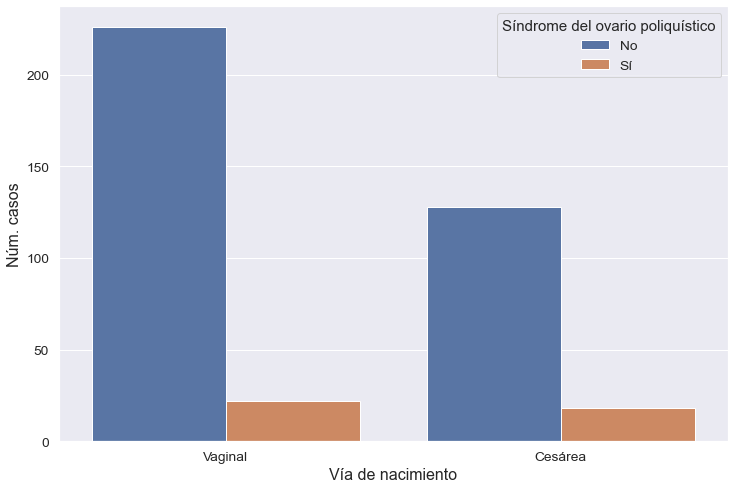

In [126]:
sns.countplot(x='VIA DE NACIMIENTO', hue='SOP', data=df)
plt.legend(title='Síndrome del ovario poliquístico')
plt.xlabel('Vía de nacimiento', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [127]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['SOP'], margins=True, margins_name='Total')

SOP,No,Sí,Total
TIEMPO DE LACTANCIA,,,
6 meses o menos,199,27,226
Más de 6 meses,103,8,111
Total,302,35,337


In [128]:
pd.crosstab(df['TIEMPO DE LACTANCIA '], df['SOP'], normalize='index').round(2)

SOP,No,Sí
TIEMPO DE LACTANCIA,,
6 meses o menos,0.88,0.12
Más de 6 meses,0.93,0.07


In [129]:
stats.chi2_contingency(pd.crosstab(df['TIEMPO DE LACTANCIA '], df['SOP']))

(1.323577920336257,
 0.24995093398301138,
 1,
 array([[202.52818991,  23.47181009],
        [ 99.47181009,  11.52818991]]))

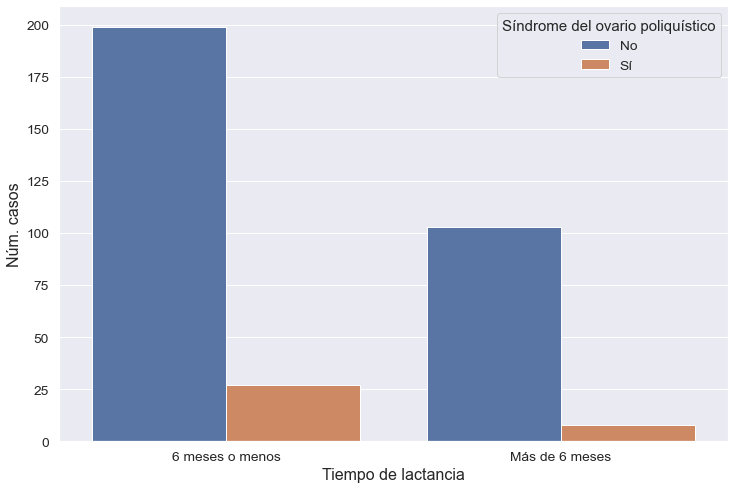

In [130]:
sns.countplot(x='TIEMPO DE LACTANCIA ', hue='SOP', data=df)
plt.legend(title='Síndrome del ovario poliquístico')
plt.xlabel('Tiempo de lactancia', size=16)
plt.ylabel('Núm. casos', size=16)
plt.show()

In [131]:
pd.crosstab(df['PARTO + LACTANCIA'], df['SOP'], margins=True, margins_name='Total')

SOP,No,Sí,Total
PARTO + LACTANCIA,,,
Vaginal - 6 meses o menos,124,19,143
Vaginal - Más de 6 meses,75,2,77
Cesárea - 6 meses o menos,75,8,83
Cesárea - Más de 6 meses,28,6,34
Total,302,35,337


In [132]:
pd.crosstab(df['PARTO + LACTANCIA'], df['SOP'], normalize='index').round(2)

SOP,No,Sí
PARTO + LACTANCIA,,
Vaginal - 6 meses o menos,0.87,0.13
Vaginal - Más de 6 meses,0.97,0.03
Cesárea - 6 meses o menos,0.90,0.10
Cesárea - Más de 6 meses,0.82,0.18


In [133]:
stats.chi2_contingency(pd.crosstab(df['PARTO + LACTANCIA'], df['SOP']))

(8.287384642483216,
 0.04043111503071031,
 3,
 array([[128.14836795,  14.85163205],
        [ 69.00296736,   7.99703264],
        [ 74.37982196,   8.62017804],
        [ 30.46884273,   3.53115727]]))

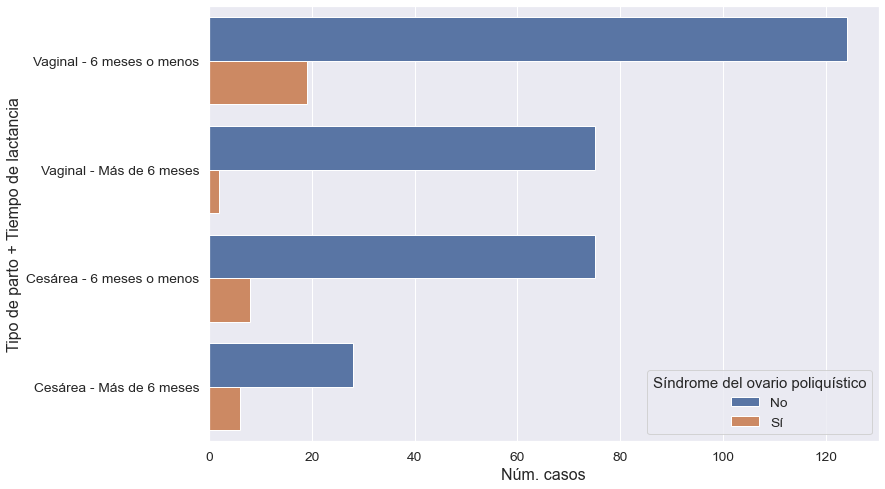

In [134]:
sns.countplot(y='PARTO + LACTANCIA', hue='SOP', data=df)
plt.legend(title='Síndrome del ovario poliquístico')
plt.ylabel('Tipo de parto + Tiempo de lactancia', size=16)
plt.xlabel('Núm. casos', size=16)
plt.show()